# **BUSINESS PROBLEM**

Description: Customer satisfaction and loyalty is a pivotal element in Food and hospitality business in determining financial performance. With the advent of various social networking sites and food ordering platforms, customers keep expressing their views and judgement about their dining experiences and taste of the food. 

**Objective** : So the objective is to analyze the text based comments made in various platforms, gauge the sentiments of customers and classify it as a positive or a negative review 

### DATA OVERVIEW 
File name: reviews.tsv

1.   Number of rows: 1000
2.   No of column: 2

### **IMPORTING LIBRARIES**

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **IMPORTING THE DATA**

In [ ]:
 df = pd.read_csv('/content/Restaurant Reviews.tsv', delimiter = '\t')

In [ ]:
#displays the first five rows of the dataframe 
df.head(5)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


### **CHECKING THE DATA TYPES**

In [ ]:
df.dtypes

Review    object
Liked      int64
dtype: object

**Features:** 
1.   Text: Review 

**Target Variable:** 
1.   Categorical: Liked     

## **CHECKING FOR CLASS IMBALANCE** 

If there exists class imbalance, number of instances in each class should be balanced. 

In [ ]:
unique = df['Liked'].value_counts()

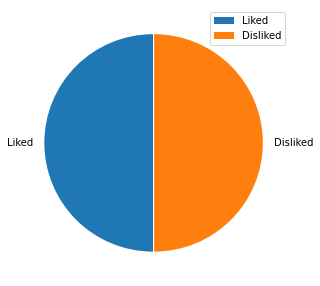

In [ ]:
plt.figure(figsize=(5, 5))
lab = ['Positive','Negative']
myexplode = [0.01, 0]
plt.pie(unique,labels = lab, explode = myexplode,startangle=90)
plt.legend()
plt.show()

The number of observations (both positive and negative comments) were found to be equal. 

In [ ]:
import re         #regular expression 
import nltk       #natural language tool kit

In [ ]:
nltk.download("stopwords")    

#downloads stopwords from nltk library         
from nltk.corpus import stopwords 

#importing porter stemmer module for stemming 
from nltk.stem.porter import PorterStemmer 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#declared empty list to collect all the refined reviews
corpus=[] 

for i in range(0,1000):

  #retaining all the none characters by space 
  review = re.sub('[^a-zA-Z]',' ', df['Review'][i])
  
  #converting to lower case and splitting
  review = review.lower()

  #splits strings into an array of substrings
  review = review.split()
  #creating the object of the porterstemmer class
  ps=PorterStemmer()

  #collecting all english stopwords
  all_stopwords=stopwords.words('english') 

  #remove stopword "not" from the ennglish stopwords
  all_stopwords.remove('not') 

  #tokenizing and stemming words to the root words
  review=[ps.stem(word) for word in review if not word in set(all_stopwords)]

  #list of words is converted into sentence using join function 
  review=' '.join(review)
  corpus.append(review)
  

### **Creating Bag of Word Models**

In [ ]:
#importing Countvectorizer module
from sklearn.feature_extraction.text import CountVectorizer

# creating the count vectorizer model to build a matrix of terms/token counts 
cv = CountVectorizer(max_features=1500)      

# feeding the corpus data to the count vectorizer model
x = cv.fit_transform(corpus).toarray()

In [ ]:
#setting the target column to the variable 
y=df.iloc[:,-1].values

In [ ]:
#dimensions of the input feature
print(x.shape)

(1000, 1500)


In [ ]:
#importing the train_test_split module
from sklearn.model_selection import train_test_split

#Splitting arrays or matrices into random train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
#defining function to evaluate the classifier's performance 
def classifier_results(x_train,y_train,x_test,y_test,y_pred): 
  from sklearn.metrics import accuracy_score,plot_confusion_matrix  #importing confusion_matrix plot from sklearn 
  from sklearn.metrics import confusion_matrix                      #importing confusion matrix 
  matrix = confusion_matrix(y_test,y_pred)                          
  True_Positive = matrix[0][0]                                      #Assigning true_positive from confusion_matrix
  True_Negative = matrix[1][1]                                      #Assigning true_negative from confusion_matrix  
  False_Positive = matrix[0][1]                                     #Assigning false_positive from confusion_matrix
  False_Negative = matrix[1][0]                                     #Assigning true_positive from confusion_matrix


  #calculating Accuracy from confusion matrix
  Accuracy = (True_Positive + True_Negative)/(True_Positive + True_Negative + False_Positive + False_Negative)
  Precison = True_Positive / (True_Positive + False_Positive)  #calculating Precision from confusion matrix 
  Recall = True_Positive / (True_Positive + False_Negative)    #calculating Recall from confusion matrix 
  F1score = (2*Precison*Recall)/(Precison+Recall)              #calculating F1 score from confusion matrix 


  print ("****** Model successfully tested ******")
  print ("******* Model Statistics ******")
  print("Training Accuracy :", classifier.score(x_train, y_train))
  print("Testing Accuracy :", classifier.score(x_test, y_test))
  print ("Accuracy of Model = ",Accuracy)
  print ("Precison of Model = ",Precison)
  print ("Recall of Model   = ",Recall)
  print ("F1score of Model  = ",F1score)
  print ("****************************")

  plot_confusion_matrix(X=x_test,y_true=y_test,estimator=classifier)

**NAIVE BAYES ALGORITHM**

In [ ]:
## importing Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train, y_train)    # Fitting Multinomial Naive Bayes to the Training set

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

****** Model successfully tested ******
******* Model Statistics ******
Training Accuracy : 0.944
Testing Accuracy : 0.768
Accuracy of Model =  0.72
Precison of Model =  0.5726495726495726
Recall of Model   =  0.7701149425287356
F1score of Model  =  0.6568627450980391
****************************


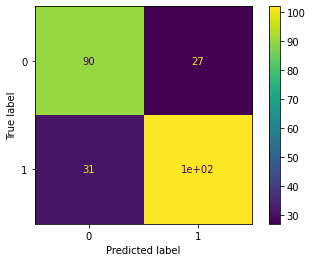

In [ ]:
#classifier performance on test set
classifier_results(x_train,y_train,x_test,y_test,y_pred)  

**RANDOM FOREST CLASSIFIER ALGORITHM**


In [ ]:
## importing Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

# predicting the test set results
y_pred = classifier.predict(x_test)

******Model successfully tested******
******Model Statistics ******
Training Accuracy : 0.996
Testing Accuracy : 0.736
Accuracy of Model =  0.736
Precison of Model =  0.905982905982906
Recall of Model   =  0.6583850931677019
F1score of Model  =  0.7625899280575539
****************************


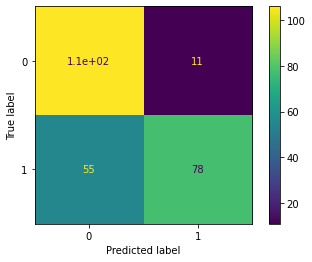

In [ ]:
#classifier performance on test set
classifier_results(x_train,y_train,x_test,y_test,y_pred)

**SUPPORT VECTOR CLASSIFIER ALGORITHM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

classifier = SVC()
classifier.fit(x_train, y_train)

# predicting the test set results
y_pred = classifier.predict(x_test)

******Model successfully tested******
******Model Statistics ******
Training Accuracy : 0.972
Testing Accuracy : 0.76
Accuracy of Model =  0.76
Precison of Model =  0.9230769230769231
Recall of Model   =  0.6792452830188679
F1score of Model  =  0.7826086956521738
****************************


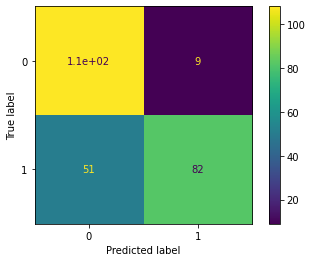

In [ ]:
classifier_results(x_train,y_train,x_test,y_test,y_pred)

**K-NEAREST NEIGHBOR CLASSIFIER ALGORITHM**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)

******Model successfully tested******
******Model Statistics ******
Training Accuracy : 0.8173333333333334
Testing Accuracy : 0.684
Accuracy of Model =  0.684
Precison of Model =  0.811965811965812
Recall of Model   =  0.625
F1score of Model  =  0.7063197026022304
****************************


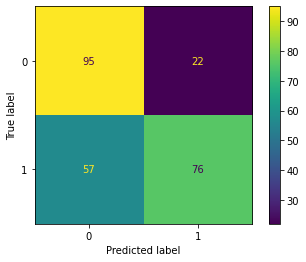

In [ ]:
classifier_results(x_train,y_train,x_test,y_test,y_pred)

Since the dataset contained roughly equal number of samples in each class [Positive (1) and Negative (0)]. The accuracy metric of the classification report could be used for deciding the right model. 


*   Accuracy of Model : tells Overall, how often is the classifier correct? and 
*   Precision of Model : tells a positive value is predicted, how often is the prediction correct?
*   Recall of Model : tells the actual value is positive, how often is the prediction correct?
*   F1 score of Model : F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall and there is an uneven class distribution (large number of Actual Negatives).









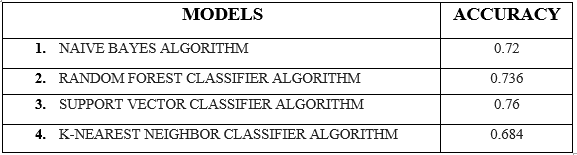

**Therefore Support Vector Classfier Algorithm predicted better in classifying the sentiment of the customers** 


